In [86]:
# Import dependencies
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from pathlib import Path
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from src.get_project_data import housing_data, locale_data
import plotly.express as px



Create a Dataframe of average housing prices by zipcode

In [87]:

#Define
housing_df = housing_data("Austin")

#The path to our CSV file for Austin housing data
housing_df = housing_df[["date", "zipcode", "zip_name", "average_listing_price"]]


# Display Texas housing data in a table
housing_df.head()




,date,zipcode,zip_name,average_listing_price
15,2023-03-01,78652,"manchaca, tx",784162
59,2023-03-01,78662,"red rock, tx",856983
83,2023-03-01,78759,"austin, tx",698303
89,2023-03-01,78747,"austin, tx",493692
97,2023-03-01,78659,"paige, tx",688996


In [88]:
#Define
locale_df = locale_data()
locale_df["LOCALE"] = locale_df["LOCALE"].map({11: 'Urban', 12: 'Urban', 13: 'Urban',
                                 21: 'Suburban', 22: 'Suburban', 23: 'Suburban',
                                 31: 'Town', 32: 'Town', 33: 'Town',
                                 41: 'Rural', 42: 'Rural', 43: 'Rural'})



# Display Texas housing data in a table
locale_df.head()

,zipcode,LOCALE
26362,75001,Suburban
26363,75002,Suburban
26364,75006,Suburban
26365,75007,Suburban
26366,75009,Rural


In [89]:
# Merge the two dataframes using an inner join
df_full = housing_df.merge(locale_df, how='left', on="zipcode")
df_full = df_full [["date", "zipcode", "zip_name", "average_listing_price", "LOCALE"]]

#Make a new column for the year from the date column
df_full["year"] = pd.DatetimeIndex(df_full["date"]).year

#Replace date column with year column
df_full = df_full [["year", "zipcode", "zip_name", "average_listing_price", "LOCALE"]]

#Group by year 
df_fullgroup = df_full.groupby(["year", "zipcode"]).agg({"average_listing_price": "mean", "LOCALE": "first"})


# Display the data table
df_fullgroup



average_listing_price LOCALE
year zipcode                              
2016 76511            135496.833333  Rural
     76527            577072.166667  Rural
     76530                 265021.0  Rural
     76537            229168.666667  Rural
     76574            281678.166667  Rural
...                             ...    ...
2023 78757            892620.666667  Urban
     78758            471727.666667  Urban
     78759            707763.666667  Urban
     78953            498333.333333  Rural
     78957            514564.333333  Rural

[737 rows x 2 columns]

In [95]:
# Create a new dataframe for the average listing price by year only
df_fullgroup = df_fullgroup.reset_index()
df_fullgroup = df_fullgroup[["year", "average_listing_price"]]
df_fullgroup = df_fullgroup.groupby(["year"]).agg({"average_listing_price": "mean"})
df_fullgroup = df_fullgroup.reset_index()

#Add column for the year over year change
df_fullgroup["YOY"] = df_fullgroup["average_listing_price"].pct_change()




# Display the data table
df_fullgroup



,year,average_listing_price,YOY
0,2016,522215.078755,<NA>
1,2017,521456.947757,-0.001452
2,2018,534342.730653,0.024711
3,2019,573144.284236,0.072615
4,2020,611179.433947,0.066362
5,2021,767373.537975,0.255562
6,2022,912159.162088,0.188677
7,2023,891685.288889,-0.022446


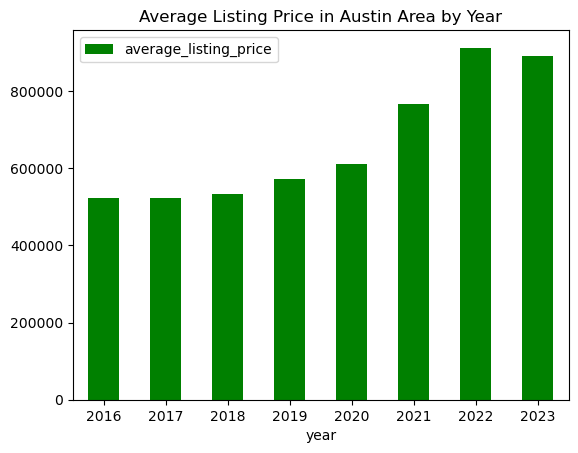

In [111]:
#create a bar graph for the average listing price by year
df_fullgroup.plot.bar(x="year", y="average_listing_price", rot=0, title="Average Listing Price in Austin Area by Year", color="green")
plt.show()



In [112]:
#create dataframe for the average listing price per locale
df_fullgroup_locale = df_full.groupby(["year", "LOCALE"]).agg({"average_listing_price": "mean"})
df_fullgroup_locale = df_fullgroup_locale.reset_index()
df_fullgroup_locale = df_fullgroup_locale[["year", "LOCALE", "average_listing_price"]]
df_fullgroup_locale = df_fullgroup_locale.groupby(["year", "LOCALE"]).agg({"average_listing_price": "mean"})
df_fullgroup_locale = df_fullgroup_locale.reset_index()


# Display the data table
df_fullgroup_locale


,year,LOCALE,average_listing_price
0,2016,Rural,449859.342342
1,2016,Suburban,1083534.190476
2,2016,Urban,528225.660714
3,2017,Rural,462612.077156
4,2017,Suburban,985623.666667
5,2017,Urban,547284.395833
6,2018,Rural,462858.879336
7,2018,Suburban,981306.940476
8,2018,Urban,577678.375
9,2019,Rural,468798.803303


In [113]:
#Create plot graph for the average listing price by year and locale
fig = px.bar(df_fullgroup_locale, x="year", y="average_listing_price", color="LOCALE", title="Average Listing Price in Austin Area by Year and Locale")
fig.show()



In [114]:
#Create a line chart for the average listing price by year
fig = px.line(df_fullgroup, x="year", y="average_listing_price", title="Average Listing Price by Year in the Austin Area")
fig.show()